In [1]:
# import packages
import numpy as np
import math
import matplotlib.pyplot as plt

import astropy.units as u
import astropy.constants as const

from orbvel import *
from rungekutte import *

In [2]:
# UNITS: kpc, Msun, Myr
# constants
G = (const.G).to(u.kpc**3 * u.Msun**-1 * u.Myr**-2).value # kpc^3/Msun/Myr

# orbit parameters
m0 = 1e12 # Msun
m1 = 1e12 # Msun
M = m0 + m1

a = 1 # (G*M*T**2/(4*np.pi**2))**(1/3)   # semi-major axis (kpc, Kepler's Law)
ecc = 1e-6 # 0.5
p = a*(1 - ecc**2)   # semi-latus rectum (kpc)

# runtime initial conditions
t0, tmax = 0, 10
h = 1e-3

# starting position of second galaxy 
r0 = p   
phi0 = -np.arccos((p - r0)/(r0*ecc))

# make sure r is close to analytic value over time
dr_tol = 1e-5  # allowable error 


In [3]:
R0 = np.array([r0, phi0], object)

# initialize arrays for t, orbital elements
ti = t0
t = np.array(ti)
Ri = R0
R = np.array([Ri])

debug = True
# break if r goes outside tolerance
r_check = Ri[0]

In [4]:
#def rk4(m0, m1, t0, tmax, r0, phi0, f, h, dr_tol, r_ref):
R, x, y, err = rk4(m0, m1, t0, tmax, r0, phi0, f, h, dr_tol, a)

(Text(0.5, 0, 'time [Myr]'), Text(0, 0.5, 'relative error'))

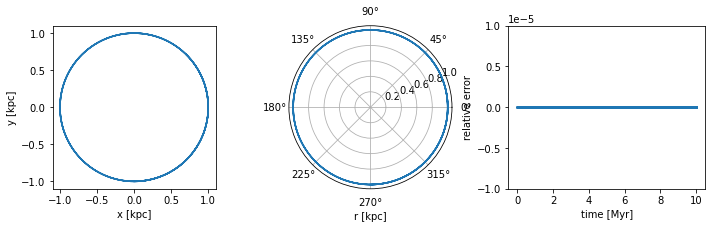

In [5]:
fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot(131, aspect='equal')
ax1.plot(x,y)
ax1.set_xlabel("x [kpc]"), ax1.set_ylabel("y [kpc]")

ax2 = fig.add_subplot(132, projection='polar')
ax2.plot(R[:,1], R[:,0])
ax2.set_xlabel("r [kpc]")

ax3 = fig.add_subplot(133,aspect='auto')
ax3.scatter(np.arange(t0, tmax+h, h), err, s=1)
ax3.set_ylim(dr_tol*np.array([-1,1]))
ax3.set_xlabel("time [Myr]"), ax3.set_ylabel("relative error")